In [104]:
# الخطوة 1: (Exploratory Data Analysis) :

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("/kaggle/input/insurance/insurance.csv")

# Display first 5 rows
print(data.head())



   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [105]:
# الخطوة 2: تنظيف البيانات (Data Cleaning):

# Checking and handling missing values
missing_values = data.isnull().sum()
print("Missing values in each column:")
print(missing_values)


Missing values in each column:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [106]:
#الخطوة 3: ترميز البيانات (Data Encoding):

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['sex'] = label_encoder.fit_transform(data['sex'])
data['smoker'] = label_encoder.fit_transform(data['smoker'])
data['region'] = label_encoder.fit_transform(data['region'])

# data after encoding
print(data.head())


   age  sex     bmi  children  smoker  region      charges
0   19    0  27.900         0       1       3  16884.92400
1   18    1  33.770         1       0       2   1725.55230
2   28    1  33.000         3       0       2   4449.46200
3   33    1  22.705         0       0       1  21984.47061
4   32    1  28.880         0       0       1   3866.85520


In [107]:
#الخطوة 4: تحضير البيانات وتقسيمها:

from sklearn.model_selection import train_test_split

X = data.drop('charges', axis=1)
y = data['charges']

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# dimensions of the training and test set
print("dimensions of training :", X_train.shape, y_train.shape)
print("dimensions of testset:", X_test.shape, y_test.shape)


dimensions of training : (974, 6) (974,)
dimensions of testset: (244, 6) (244,)


In [108]:
#الخطوة 5: تنفيذ Ridge Regression وضبط الهايبربارامترز:

from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# تحديد نموذج Ridge Regression
ridge_model = Ridge()

# تعريف قائمة بالهايبربارامترز الممكنة للضبط
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# إعداد GridSearchCV
grid_search = GridSearchCV(ridge_model, param_grid, cv=5, scoring='r2')

# تدريب النموذج باستخدام GridSearchCV
grid_search.fit(X_train, y_train)

# القيمة الأفضل للهايبربارامتر
best_alpha = grid_search.best_params_['alpha']
print("best value alpha:", best_alpha)

# النموذج بعد التدريب
best_model = grid_search.best_estimator_


best value alpha: 1


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


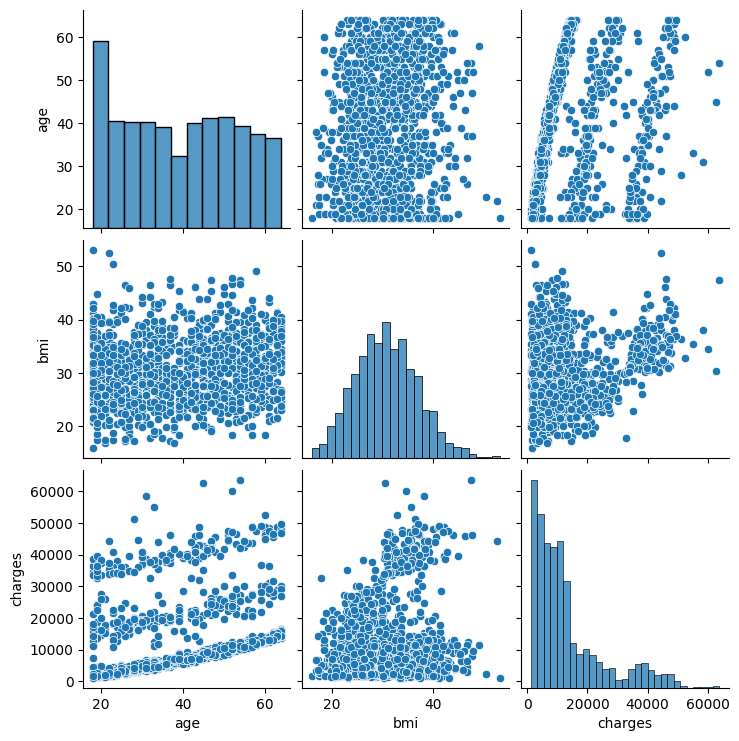

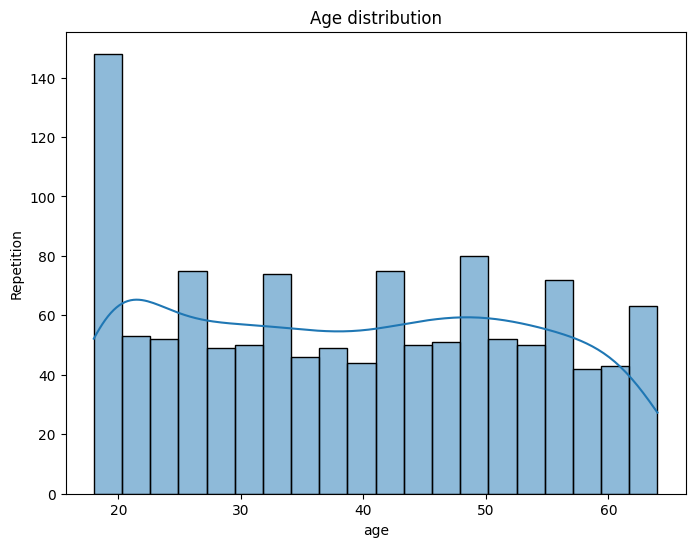

In [109]:
#التصور البصري (Visualization): 7

import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(data[['age', 'bmi', 'charges']])
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(data['age'], bins=20, kde=True)
plt.title('Age distribution')
plt.xlabel('age')
plt.ylabel('Repetition')
plt.show()



In [110]:
#توحيد البيانات (Standardization): 8

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [111]:
# تصنيف السجلات باستخدام Ridge Regression: 9

from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=best_alpha)  
ridge_model.fit(X_train_scaled, y_train)

y_pred = ridge_model.predict(X_test_scaled)


In [112]:
#الخطوة 6: تقييم الأداء:

from sklearn.metrics import r2_score

y_pred = best_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print("R2 equal :", r2)


R2 equal : 0.7321335761120491
